## Formatting the data
The data available is not perfect. Some articles are too short to work with or contain no body. Such texts will be filtered out - The data will be loaded from a JSON and converted to a Pandas dataframe. 

Author: lkt259@alumni.ku.dk

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('seaborn')

In [41]:
#Load data - and show 120 characters of the body.
data = pd.read_json(r'data/data.json')
pd.set_option('display.max_colwidth', 220)
data.head(3)

,Id,Domain,Body,Header,PublicationDate,Uri,Byline,TextHash
0,14692,computerworld.dk,"En Google-produktchef har sagsøgt sin egen arbejdsgiver for 27 milliarder for selskabets interne tys-tys-program, som Google-chefen mener, er i strid med arbejdsreglerne i den amerikanske stat Californien.\nBlandt an...",Google-chef sagsøger sin arbejdsgiver for 27 milliarder kroner for hemmeligt spion-program,NaN,None,None,0
1,14693,computerworld.dk,"Microsofts flagskibsprodukt hed engang Windows. Sådan er det ikke længere.\nI stedet har it-giganten i de seneste års tid travlt med at få skubbet sin Azure-sky udover rampen med løfter om lettere datahåndtering, sma...",Microsoft: Azure kan overtage vigtige dele af Windows med tiden,NaN,None,None,0
2,14694,computerworld.dk,"I området omkring Rosenbad i Stockholm ligger flere af broderlandets mest følsomme virksomheder.\nDet er også her, at statsministeren arbejder og så er udenrigsministeriet og Rigsdagen placeret i området.\nI dette po...",Regeringsovervågningen breder sig fra Norge til Sverige,NaN,None,Regeringsovervågningen breder sig fra Norge til Sverige,0


### Find the minimum length of bodies
Let's see the distribution of the body lengths.

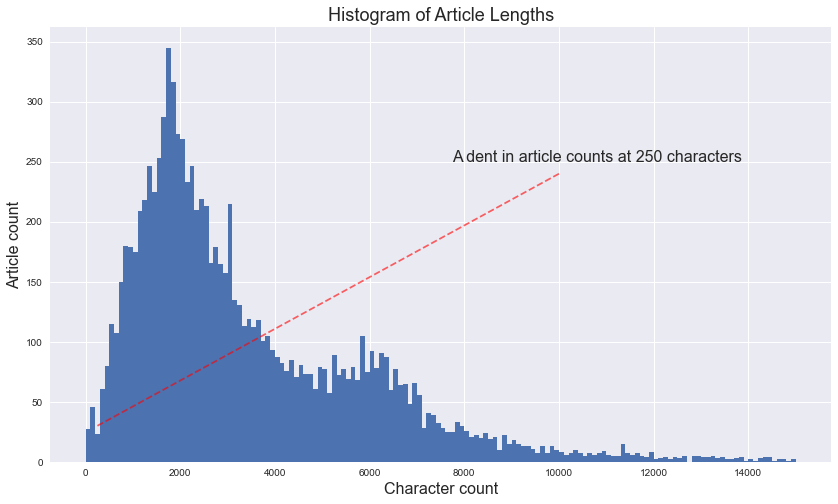

In [130]:
body_lengths = data['Body'].str.len()

desc = "A dent in article counts at 250 characters"

y, bin_edges = np.histogram(body_lengths, bins=150, range=(0,15000))
x = 0.5*(bin_edges[1:] + bin_edges[:-1])

fig, ax = plt.subplots(1, figsize=(14,8))
plt.bar(x,y,width=np.diff(bin_edges))
plt.title("Histogram of Article Lengths", fontsize=18)
plt.xlabel("Character count", fontsize=16)
plt.ylabel("Article count", fontsize=16)
plt.text(0.7, 0.7, desc, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes, fontsize=16)
plt.plot([250,10000], [30,240], '--', c='red', alpha=.6)

Could that be a good separator?

### Filter the data

In [133]:
min_length = 250
short_bodies = body_lengths[body_lengths < min_length]
bad_bodies = data.iloc[short_bodies.index]
bad_bodies.head()

,Id,Domain,Body,Header,PublicationDate,Uri,Byline,TextHash
909,15602,ritzau.com,test /ritzau/,test,NaN,None,None,0
1124,15817,ritzau.com,"- Får din hund allergi, kan det skyldes foderet. - Det kan også skyldes miljøet eksempelvis ved støvallergi. - Alle hunde kan få allergi, men meget lyse hunde er særligt i risikogruppen. Kilde: Dyreværnet. /ri...",FAKTA: Allergi hos hunden,NaN,None,None,0
1244,15937,ritzau.com,- Stauder. - Buske og træer. - Krokus. - Tulipaner. - Forårsløg. Kilde: havefaglig rådgiver i Haveselskabet Louise Møller. /ritzau fokus/,FAKTA: Det bør du plante ud i september og oktober,NaN,None,None,0
2153,16848,ekstrabladet.dk,"Joe Ralls, Cardiff City (tre kampe) Wes Morgan, Leicester City (to kampe) Christian Kabasele, Watford (en kamp) José Holebas, Watford (en kamp)",Karantæner,NaN,None,Hans-Henrik Hybholt Hare,0
2346,17041,ekstrabladet.dk,Ti fuldtræffere 31. okt. 2019 Ti forbiere 30. okt. 2019,Stor kåring: Superligaens fuldtræffere - og forbiere,NaN,None,"Klaus Egelund,Mads Glenn Wehlast",0


It seems, most of these short articles are sport results and lists of items. Not useful for article work. 